# N-gram defination (aka bag of n-grams)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["I love to eat ice cream.", "I scream, you scream, we all scream for ice cream!"]

# CountVectorizer with desired n-gram value
v = CountVectorizer(ngram_range=(1,2))  # Generates from 1 to 3 grams

ngrams = v.fit_transform(sentences)

# Get the feature names 
feature_names = v.get_feature_names()

# Print the feature names and the n-gram representation
print("Feature names:", feature_names)
print()
print("N-gram representation:\n", ngrams.toarray())


Feature names: ['all', 'all scream', 'cream', 'eat', 'eat ice', 'for', 'for ice', 'ice', 'ice cream', 'love', 'love to', 'scream', 'scream for', 'scream we', 'scream you', 'to', 'to eat', 'we', 'we all', 'you', 'you scream']

N-gram representation:
 [[0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0]
 [1 1 1 0 0 1 1 1 1 0 0 3 1 1 1 0 0 1 1 1 1]]


In [3]:
voca=v.vocabulary_
voca #it shows the index of the features e.g= 'love': 12 (at index 12)

{'love': 12,
 'to': 22,
 'eat': 4,
 'ice': 10,
 'cream': 3,
 'love to': 13,
 'to eat': 23,
 'eat ice': 5,
 'ice cream': 11,
 'love to eat': 14,
 'to eat ice': 24,
 'eat ice cream': 6,
 'scream': 15,
 'you': 28,
 'we': 25,
 'all': 0,
 'for': 7,
 'scream you': 20,
 'you scream': 29,
 'scream we': 18,
 'we all': 26,
 'all scream': 1,
 'scream for': 16,
 'for ice': 8,
 'scream you scream': 21,
 'you scream we': 30,
 'scream we all': 19,
 'we all scream': 27,
 'all scream for': 2,
 'scream for ice': 17,
 'for ice cream': 9}

In [4]:
print(voca['love'])
print(len(v.get_feature_names()))

12
31


In [ ]:
'''
N-grams may increse the dimensionalty and sparcity thats means it increase the feathers as well. so when n-value is high
there will be large number of vocabulary, Then the model easily finds patterns in the training data hence increase 
risk of overfitting
'''

In [ ]:
'''by including punctuation in n-grams, we can capture  valuable contextual information 
that can be benifecial in tasks such as sentiment analysis, dialog modeling etc

Also we can easily derived the structure and grammmer of a language like using question mark(?), ! mark we can
differntiate the tone of a sentence
'''

# Sentiment AnaLaysis

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline


In [6]:
#Importing the dataset
df =pd.read_csv("tripadvisor_hotel.csv")
# look the data set
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [8]:
# any duplicate data 
print ("Is there Duplicate values?")
print(df.duplicated().sum())

print(df['Rating'].value_counts())

Is there Duplicate values?
0
5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


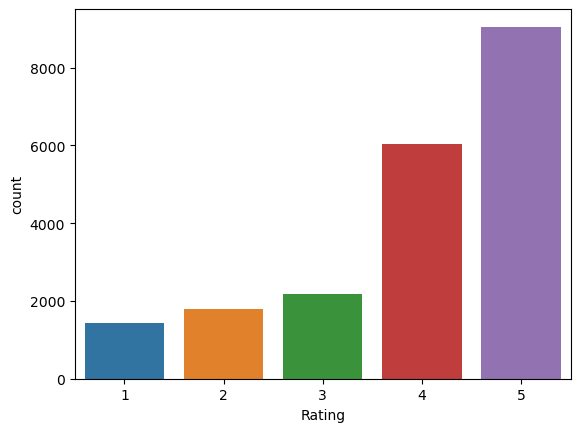

In [9]:
# how much rating in the dataset

sns.countplot(df['Rating'])
pl.show()


In [10]:
df_neg = df.loc[df['Rating']<3]
df_neg = df_neg.reset_index (drop =True)#doesn't hold the old index

In [11]:
df_pos = df.loc[df['Rating']>=4]
df_pos = df_pos.reset_index (drop =True)

In [12]:
print(len(df_pos))

15093


In [13]:
df_pos = df_pos.loc[:len(df_neg)]

In [14]:
print(len(df_pos))

3215


In [15]:
df_all = pd.concat([df_pos,df_neg], axis=0)
df_pos = df_pos.reset_index (drop =True)

In [16]:
df_all.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,"unique, great stay, wonderful time hotel monac...",5
2,"great stay great stay, went seahawk game aweso...",5
3,love monaco staff husband stayed hotel crazy w...,5
4,"cozy stay rainy city, husband spent 7 nights m...",5


In [17]:
df_all['Sentiment'] = np.where(df_all['Rating'] >= 4, 'Positive', 'Negetive')

In [18]:
df_all

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,"unique, great stay, wonderful time hotel monac...",5,Positive
2,"great stay great stay, went seahawk game aweso...",5,Positive
3,love monaco staff husband stayed hotel crazy w...,5,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5,Positive
...,...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2,Negetive
3210,not impressed unfriendly staff checked asked h...,2,Negetive
3211,"ok just looks nice modern outside, desk staff ...",2,Negetive
3212,hotel theft ruined vacation hotel opened sept ...,1,Negetive


In [43]:
review_at_index = df_all.loc[0,'Review']
print(review_at_index)


0    nice hotel expensive parking got good deal sta...
0    ok nothing special charge diamond member hilto...
Name: Review, dtype: object


# TRAIN_TEST_SPLIT

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_all.Review,df_all.Sentiment,random_state=42)

# Vectorizing 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer with desired n-gram value
vc = CountVectorizer(ngram_range=(1,2))  # Generates from 1 to 3 grams
x_train_vec = vc.fit_transform(x_train)

# Get the feature names 
#feature_names2 = vc.get_feature_names()

/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Training the model LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train_vec,y_train)

LogisticRegression()

# Predicting 

In [25]:
predictions = model.predict(vc.transform(x_test)) #using test set

In [26]:
predctions

array(['Positive', 'Positive', 'Negetive', ..., 'Positive', 'Negetive',
       'Positive'], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9496268656716418


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9496187591672952


In [44]:
rev = ["Hotel's bed were really clean and comfortable", "Hotel's toilet was really dirty"]
rev_vec = vc.transform(rev)
model.predict(rev_vec)


array(['Positive', 'Negetive'], dtype=object)

- What are n-grams  (1.5 pts)
- Why might you use n-grams (1.5 pts)
- Why would there be a risk for overfitting the data with n-grams (1.5 pts)
- Earlier, we basically wanted to get rid off punctuations, but here, why we might want to use them here? (2 pts)
